In [2]:
from ctoybox import Toybox, Input, State
import numpy as np
import json
import math

from matplotlib.pyplot import imshow, subplots, tight_layout


In [3]:
# unsorted_edges = filter(lambda x: x['triggers_chase'] == True ,tb.state_to_json()['board']['boxes'])
# edges = sorted(list(unsorted_edges), key = lambda x: x['top_left']['tx'] + x['top_left']['ty'] + x['bottom_right']['tx'] + x['bottom_right']['ty'])

def get_corners(edges): #returns world-coordinates of corners of the map
    
    #how do you convert from world-points to screen points???
    
    top_left_corner = {'x' : (edges[0]['top_left']['tx'] ), 'y' : (edges[0]['top_left']['ty'])} 
    bottom_left_corner = {'x': edges[1]['top_left']['tx'], 'y': edges[1]['bottom_right']['ty']} #how to convert from tx to x?
    top_right_corner = {'x': edges[2]['top_left']['ty'], 'y': edges[2]['bottom_right']['tx']}
    bottom_right_corner = {'x': edges[3]['bottom_right']['tx'], 'y': edges[3]['bottom_right']['ty']}
    
    return [top_left_corner, bottom_left_corner, top_right_corner, bottom_right_corner]
    

In [29]:
def get_walls(tiles):
    
    walls = []
    
    for i in range(len(tiles)):
        for j in range(len(tiles[i])):
            if tiles[i][j] == 'Empty':
                coord = {'tx': i , 'ty': j}
                walls.append(coord)
    return walls
    

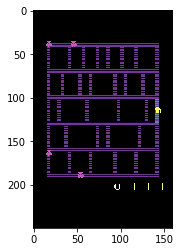

In [5]:

with Toybox("amidar") as tb:
    
    unsorted_edges = filter(lambda x: x['triggers_chase'] == True ,tb.state_to_json()['board']['boxes'])
    edges = sorted(list(unsorted_edges), key = lambda x: x['top_left']['tx'] + x['top_left']['ty'] + x['bottom_right']['tx'] + x['bottom_right']['ty'])
    
        
    imshow(tb.get_rgb_frame())
            

In [30]:


with Toybox('amidar') as tb:
        print(sorted(tb.state_to_json().keys()))
        print('\n')
        print(get_walls(tb.state_to_json()['board']['tiles']))


['board', 'chase_timer', 'enemies', 'jump_timer', 'jumps', 'level', 'lives', 'player', 'rand', 'score']


[{'tx': 1, 'ty': 1}, {'tx': 1, 'ty': 2}, {'tx': 1, 'ty': 3}, {'tx': 1, 'ty': 4}, {'tx': 1, 'ty': 5}, {'tx': 1, 'ty': 7}, {'tx': 1, 'ty': 8}, {'tx': 1, 'ty': 9}, {'tx': 1, 'ty': 11}, {'tx': 1, 'ty': 12}, {'tx': 1, 'ty': 13}, {'tx': 1, 'ty': 15}, {'tx': 1, 'ty': 16}, {'tx': 1, 'ty': 18}, {'tx': 1, 'ty': 19}, {'tx': 1, 'ty': 20}, {'tx': 1, 'ty': 22}, {'tx': 1, 'ty': 23}, {'tx': 1, 'ty': 24}, {'tx': 1, 'ty': 26}, {'tx': 1, 'ty': 27}, {'tx': 1, 'ty': 28}, {'tx': 1, 'ty': 29}, {'tx': 1, 'ty': 30}, {'tx': 2, 'ty': 1}, {'tx': 2, 'ty': 2}, {'tx': 2, 'ty': 3}, {'tx': 2, 'ty': 4}, {'tx': 2, 'ty': 5}, {'tx': 2, 'ty': 7}, {'tx': 2, 'ty': 8}, {'tx': 2, 'ty': 9}, {'tx': 2, 'ty': 11}, {'tx': 2, 'ty': 12}, {'tx': 2, 'ty': 13}, {'tx': 2, 'ty': 15}, {'tx': 2, 'ty': 16}, {'tx': 2, 'ty': 18}, {'tx': 2, 'ty': 19}, {'tx': 2, 'ty': 20}, {'tx': 2, 'ty': 22}, {'tx': 2, 'ty': 23}, {'tx': 2, 'ty': 24}, {'tx':

In [11]:
def distance(pos, e1): #calculate distance between players position and enemies position
    x = e1['x'] - pos['x']
    y = e1['y'] - pos['y']
    
    dist = math.sqrt( x**2 + y**2)
    
    return dist
    

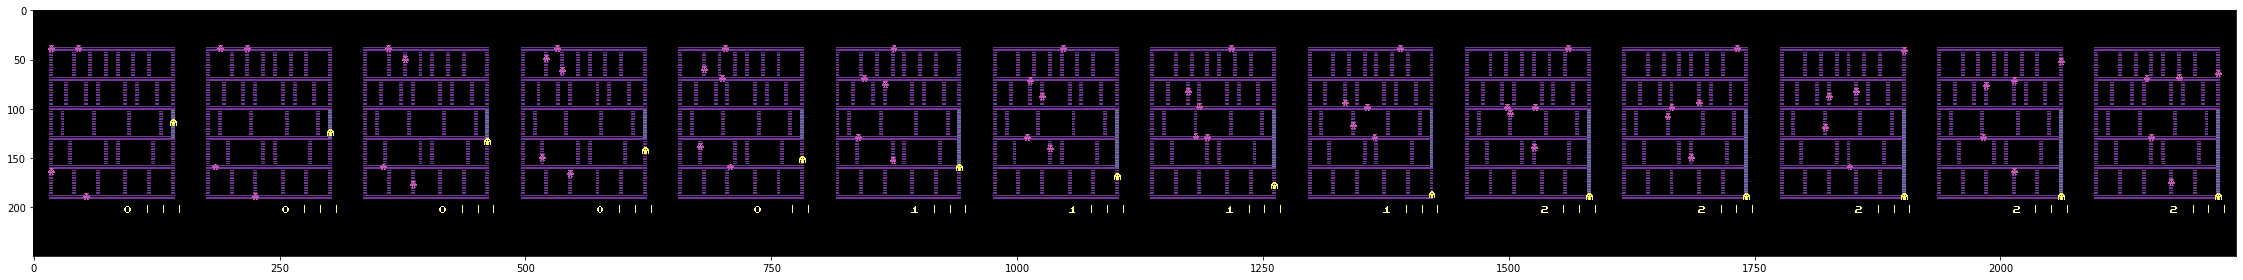

In [35]:
# Construct our two actions: fire & nothing
fire = Input()
fire.down = True
direction = "down"
noop = Input()

# We will collect rendered frames in this variable.
frames = []

with Toybox('amidar') as tb:
    tb.apply_action(fire)
    frames.append(tb.get_rgb_frame())
    # see what happens over time!
    for i in range(280):
        tb.apply_action(fire)
        pos = tb.state_to_json()['player']['position']
        e1 = tb.state_to_json()['enemies'][0]['position']
        e2 = tb.state_to_json()['enemies'][1]['position']
        e3 = tb.state_to_json()['enemies'][2]['position']
        e4 = tb.state_to_json()['enemies'][3]['position'] 
        
        if i % 20 == 0 and i > 0:
            frames.append(tb.get_rgb_frame())
            
        
            
            
# render the images we collected horizontally:
subplots(figsize=(len(frames)*3, 4))
imshow(np.hstack(frames))
tight_layout() # makes it a little bigger.